# Tutorial: Logistic Regression

Agenda:
1. Gradient Descent for Multiclass Logisitc Regression
2. Classification running example: Iris Flowers
3. Decision boundaries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gradient Descent for Multiclass Logisitc Regression

Multiclass logistic regression:

\begin{align}
{\bf z} &= {\bf W}{\bf x} + {\bf b} \\
{\bf y} &= \text{softmax}({\bf z}) \\
{\mathcal L}_\text{CE} &= -{\bf t}^T(\log \bf{y})
\end{align}

where

\begin{align}
{\bf W}\in \mathbb{R}^{K\times D} \\
{\bf x}\in \mathbb{R}^{D \times 1} \\
{\bf b}\in \mathbb{R}^{K \times 1} \\
{\bf z}\in \mathbb{R}^{K \times 1} \\
{\bf y}\in \mathbb{R}^{K \times 1} \\
{\bf t}\in \mathbb{R}^{K \times 1} \\
\end{align}

$D$ is the input dimension and ${K}$ is the number of classes (or labels)

In [2]:
# Aside: lots of functions work on vectors

print (np.log([1.5,2,3]))
print (np.exp([1.5,2,3]))

[0.40546511 0.69314718 1.09861229]
[ 4.48168907  7.3890561  20.08553692]


Start by expanding the cross entropy loss so that we can work with it

$$ {\mathcal L}_\text{CE} = -\sum_l t_l \log(y_l)$$

### Main setup

We'll take the derivative with respect to the loss:

\begin{align}
\frac{\partial {\mathcal L}_\text{CE}}{\partial w_{kj}} &=
  \frac{\partial }{\partial w_{kj}} (-\sum_l t_l \log(y_l)) \\
&= -\sum_l \frac{t_l}{y_l} \frac{\partial y_l}{\partial w_{kj}}
\end{align}

Normally in calculus we have the rule:

\begin{align}
\frac{\partial y_l}{\partial w_{kj}} &=
  \sum_m \frac{\partial y_l}{\partial z_m} \frac{\partial z_m}{\partial w_{kj}}
\end{align}

But $w_{kj}$ is independent of $z_m$ for $m \ne k$, so

\begin{align}
\frac{\partial y_l}{\partial w_{kj}} &=
  \frac{\partial y_l}{\partial z_k} \frac{\partial z_k}{\partial w_{kj}}
\end{align}

AND

$$\frac{\partial z_k}{\partial w_{kj}} = x_j$$


Thus

\begin{align}
\frac{\partial {\mathcal L}_\text{CE}}{\partial w_{kj}} &=
-\sum_l \frac{t_l}{y_l} \frac{\partial y_l}{\partial z_k} \frac{\partial z_k}{\partial w_{kj}} \\
&=
-\sum_l \frac{t_l}{y_l} \frac{\partial y_l}{\partial z_k} x_j \\
&= x_j (-\sum_l \frac{t_l}{y_l} \frac{\partial y_l}{\partial z_k}) \\
&= x_j \frac{\partial {\mathcal L}_\text{CE}}{\partial z_k}
\end{align}

### Derivative with respect to $z_k$

$$
\frac{\partial y_l}{\partial z_k} =
\begin{cases}
-y_l y_k & \text{if } l \neq k \\
y_l (1 - y_k) & \text{if } l = k
\end{cases}
$$


In [3]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [4]:
x1 = np.array([1,3,3])
softmax(x1)

array([0.06337894, 0.46831053, 0.46831053])

In [5]:
x2 = np.array([1000,3000,3000])
softmax(x2)

<ipython-input-3-01abb8604455>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x))
<ipython-input-3-01abb8604455>:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x))


array([nan, nan, nan])

This format of softamx function creates an issue when we have large numbers. Think about how to fix this numerical issue.

Given: $\mathbf{y} = \text{softmax}(\mathbf{z})$,

where $\mathbf{y}$ is a vector and $\mathbf{z}$ is a vector.

The softmax function is defined as:

\begin{align}
\text{softmax}(\mathbf{z})_l = \frac{e^{z_l}}{\sum_k e^{z_k}}
\end{align}

To find the derivatives of $\mathbf{y}$ with respect to $\mathbf{z}$, we will first compute the derivative of each element $y_l$ with respect to $z_k$. We'll start with the case when $l \neq k$:

For $l \neq k$:
\begin{align}
\frac{\partial y_l}{\partial z_k} = \frac{\partial}{\partial z_k} \left(\frac{e^{z_l}}{\sum_j e^{z_j}}\right)
\end{align}

Using the quotient rule for differentiation:

\begin{align}
\frac{\partial}{\partial z_k} \left(\frac{e^{z_l}}{\sum_j e^{z_j}}\right) = \frac{e^{z_l} \frac{\partial}{\partial z_k}(\sum_j e^{z_j}) - \sum_j e^{z_j} \frac{\partial}{\partial z_k}(e^{z_l})}{(\sum_j e^{z_j})^2}
\end{align}

Since $\frac{\partial}{\partial z_k}(e^{z_l}) = 0$ when $l \neq k$, the expression simplifies to:

\begin{align}
\frac{\partial y_l}{\partial z_k} = -\frac{e^{z_l} e^{z_k}}{\left(\sum_j e^{z_j}\right)^2}
\end{align}

Now, let's consider the case when $l = k$:

For $l = k$:
\begin{align}
\frac{\partial y_l}{\partial z_k} = \frac{\partial}{\partial z_k} \left(\frac{e^{z_l}}{\sum_j e^{z_j}}\right)
\end{align}

Again, using the quotient rule:

\begin{align}
\frac{\partial}{\partial z_k} \left(\frac{e^{z_l}}{\sum_j e^{z_j}}\right) = \frac{e^{z_l} \frac{\partial}{\partial z_k}(\sum_j e^{z_j}) - \sum_j e^{z_j} \frac{\partial}{\partial z_k}(e^{z_l})}{(\sum_j e^{z_j})^2}
\end{align}

Since $\frac{\partial}{\partial z_k}(e^{z_l}) = e^{z_l}$ when $l = k$, the expression simplifies to:

\begin{align}
\frac{\partial y_l}{\partial z_k} = \frac{e^{z_k}}{\sum_j e^{z_j}} \left(1 - \frac{e^{z_l}}{\sum_j e^{z_j}}\right)
\end{align}

So, the derivatives of $\mathbf{y}$ with respect to $\mathbf{z}$ are given by:

For $l \neq k$:
\begin{align}
\frac{\partial y_l}{\partial z_k} = -\frac{e^{z_l} e^{z_k}}{\left(\sum_j e^{z_j}\right)^2} = -y_ly_k
\end{align}

For $l = k$:
\begin{align}
\frac{\partial y_l}{\partial z_k} = \frac{e^{z_k}}{\sum_j e^{z_j}} \left(1 - \frac{e^{z_l}}{\sum_j e^{z_j}}\right)= y_l(1-y_k)
\end{align}


Therefore

\begin{align}
\frac{\partial {\mathcal L}_\text{CE}}{\partial z_k} &=
-\sum_l \frac{t_l}{y_l} \frac{\partial y_l}{\partial z_k} \\
&= -\frac{t_k}{y_k} y_k(1 - y_k) - \sum_{l \ne k} \frac{t_l}{y_l} (-y_k y_l) \\
&= - t_k(1 - y_k) + \sum_{l \ne k} t_l y_k \\
&= -t_k + t_k y_k + \sum_{l \ne k} t_l y_k \\
&= -t_k + \sum_{l} t_l y_k \\
&= -t_k + y_k \sum_{l} t_l  \\
&= -t_k + y_k \\
&= y_k - t_k
\end{align}

### Putting it all together

\begin{align}
\frac{\partial {\mathcal L}_\text{CE}}{\partial w_{kj}}
&= x_j (y_k - t_k)
\end{align}

### Vectorization

Outer product.

\begin{align}
\frac{\partial {\mathcal L}_\text{CE}}{\partial {\bf W}}
&= (\bf{y} - \bf{t}) \bf{x}^T \\
\frac{\partial {\mathcal L}_\text{CE}}{\partial {\bf b}}
&= (\bf{y} - \bf{t})
\end{align}



## Classification with Iris

We're going to use the Iris dataset.

We will start by working with the first 2 flower classes
(Setosa and Versicolour), and with just the first
two features: length and width of the sepal

If you don't know what the sepal is, see this
diagram:
https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print (iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
data = iris.data
target = iris.target
print(data.shape)
print(target.shape)

(150, 4)
(150,)


In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

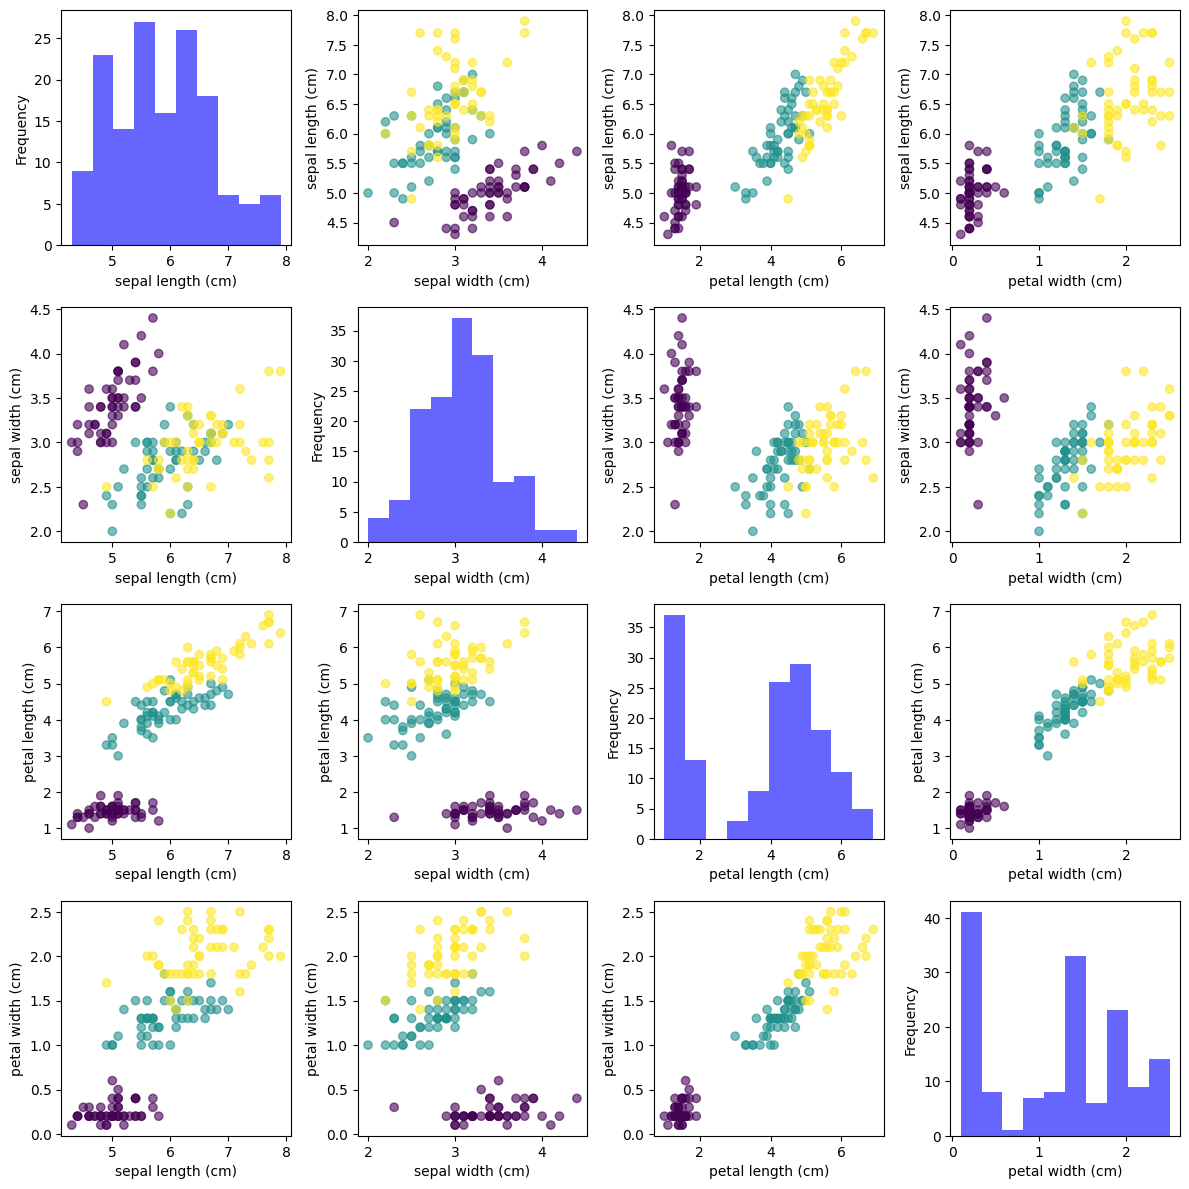

In [10]:
# Create a scatter matrix plot
fig, axes = plt.subplots(nrows=data.shape[1], ncols=data.shape[1], figsize=(12, 12))

# Create a list of labels for x and y axes
x_labels = iris.feature_names
y_labels = iris.feature_names

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        if i == j:
            # Histograms on the diagonal
            axes[j, i].hist(data[:, i], color="blue", alpha=0.6)
            axes[j, i].set_xlabel(x_labels[i])
            axes[j, i].set_ylabel("Frequency")
        else:
            # Scatter plots for off-diagonal elements
            axes[j, i].scatter(data[:, i], data[:, j], c=target, alpha=0.6)
            axes[j, i].set_xlabel(x_labels[i])
            axes[j, i].set_ylabel(y_labels[j])

plt.tight_layout()
plt.show()

In [11]:
# Select first 2 flower classes (~100 rows)
# And first 2 features

sepal_len = data[:100,0]
sepal_wid = data[:100,1]
labels = target[:100]

# We will also center the data
# This is done to make numbers nice, so that we have no
# need for biases in our classification. (You might not
# be able to remove biases this way in general.)

sepal_len = sepal_len - np.mean(sepal_len)
sepal_wid = sepal_wid - np.mean(sepal_wid)

Text(0, 0.5, 'sepal width')

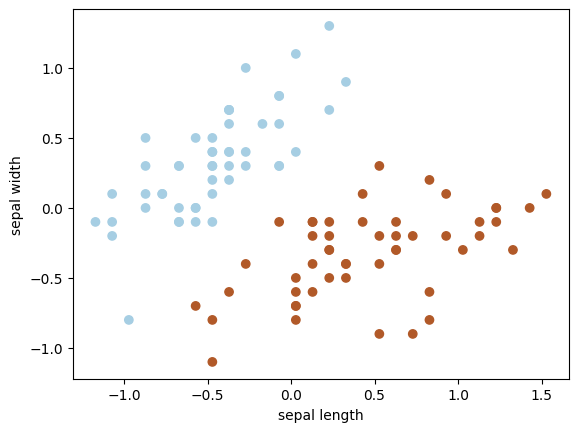

In [12]:
# Plot Iris

plt.scatter(sepal_len,
            sepal_wid,
            c=labels,
            cmap=plt.cm.Paired
            )
plt.xlabel("sepal length")
plt.ylabel("sepal width")

### Plotting Decision Boundary

Plot decision boundary hypothese

$$w_1 x_1 + w_2 x_2 \ge 0$$

for classification as Setosa.

In [13]:
def plot_sep(w1, w2, color='green'):
    '''
    Plot decision boundary hypothesis
      w1 * sepal_len + w2 * sepal_wid = 0
    in input space, highlighting the hyperplane
    '''
    plt.scatter(sepal_len,
                sepal_wid,
                c=labels,
                cmap=plt.cm.Paired)
    plt.title("Separation in Input Space")
    plt.ylim([-1.5,1.5])
    plt.xlim([-1.5,2])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    if w2 != 0:
        m = -w1/w2
        t = 1 if w2 > 0 else -1
        plt.plot(
            [-1.5,2.0],
            [-1.5*m, 2.0*m],
            '-y',
            color=color)
        plt.fill_between(
            [-1.5, 2.0],
            [m*-1.5, m*2.0],
            [t*1.5, t*1.5],
            alpha=0.2,
            color=color)
    if w2 == 0: # decision boundary is vertical
        t = 1 if w1 > 0 else -1
        plt.plot([0, 0],
                 [-1.5, 2.0],
                 '-y',
                color=color)
        plt.fill_between(
            [0, 2.0*t],
            [-1.5, -2.0],
            [1.5, 2],
            alpha=0.2,
            color=color)

<ipython-input-13-42d05d146670>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


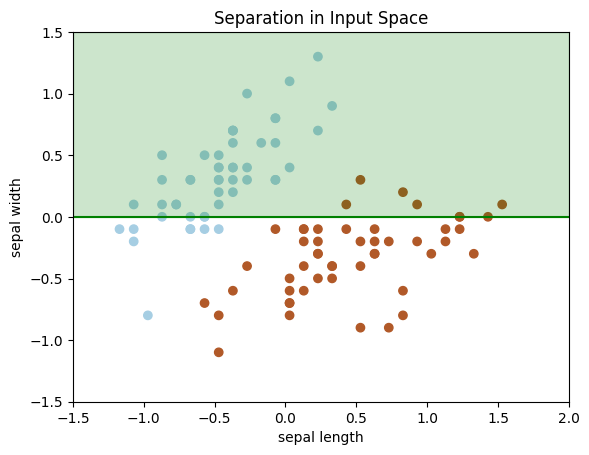

In [14]:
# Example hypothesis
#   sepal_wid >= 0

plot_sep(0, 1)

<ipython-input-13-42d05d146670>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


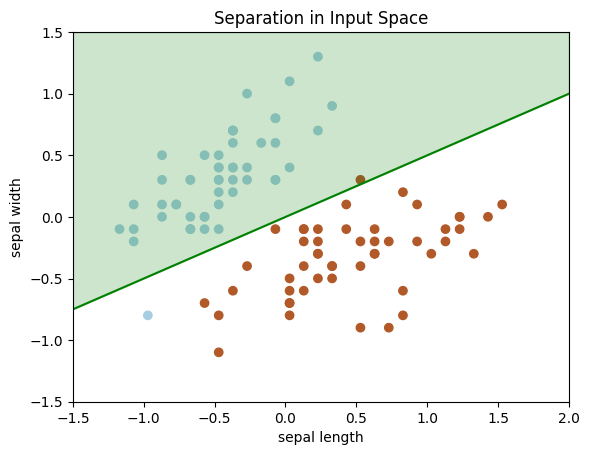

In [15]:
# Another example hypothesis:
#   -0.5*sepal_len + 1*sepal_wid >= 0

plot_sep(-0.5, 1)

<ipython-input-13-42d05d146670>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


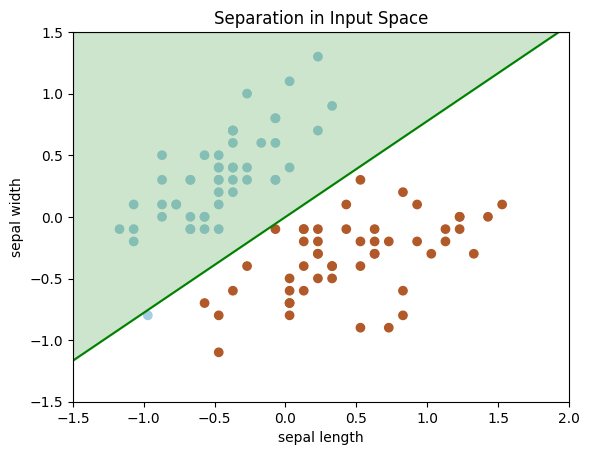

In [16]:
plot_sep(-1.4, 1.8)

### Let us try to find those optimal weights for the decision boundray
Here, we will use LogisticRegression from sklearn to train the model. However, you will build the model from scratch in your HW.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(np.column_stack((sepal_len, sepal_wid)), labels, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


1.0


[[ 2.88868422 -2.72918342]]
2.8886842177793457
-2.7291834171827545


<ipython-input-13-42d05d146670>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


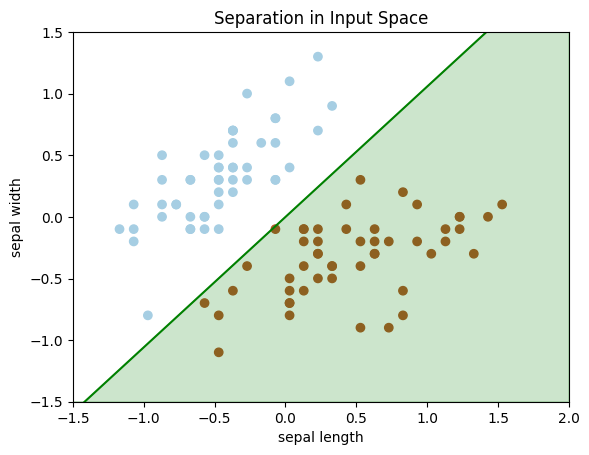

In [18]:
print(model.coef_)
print(model.coef_[0][0])
print(model.coef_[0][1])
plot_sep(model.coef_[0][0], model.coef_[0][1])

### Let us now consider sepal length and sepal width for the three classes

In [19]:
X = data[:,0:2]
y = target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9


In [21]:
model.coef_

array([[-2.50280394,  2.16157087],
       [ 0.62272951, -1.44206518],
       [ 1.88007444, -0.71950568]])

<ipython-input-22-30dd5c5c6b02>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color=color, label=f'Class {i}', cmap=cmap)


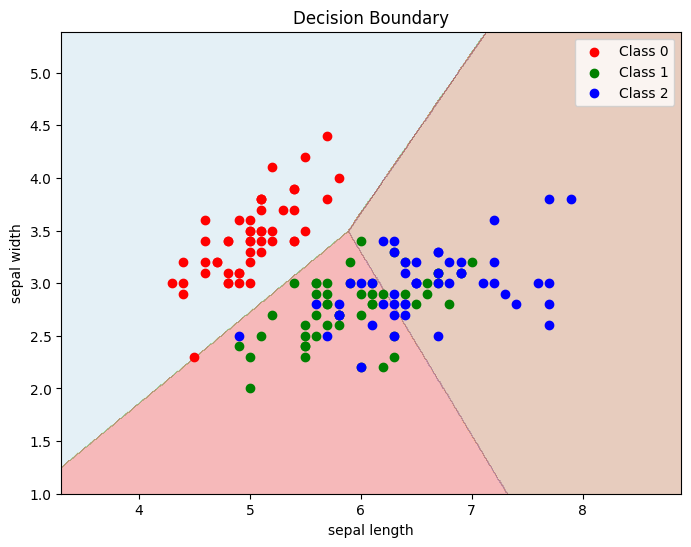

In [22]:
def plot_decision_boundary(X, y, model, colors=['r', 'g', 'b'], cmap=plt.cm.Paired):
    '''
    Plot decision boundaries for a trained logistic regression model.
    Input:
    - X: Input features (2D)
    - y: Class labels (0, 1, 2, etc.)
    - model: Trained logistic regression model (e.g., from sklearn)
    - colors: Colors for each class (default is ['r', 'g', 'b'])
    - cmap: Color map (default is plt.cm.Paired)
    '''
    plt.figure(figsize=(8, 6))

    # Create a meshgrid for the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict class labels for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Scatter plot for data points
    for i, color in enumerate(colors):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color=color, label=f'Class {i}', cmap=cmap)

    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, model, colors=['r', 'g', 'b'])


#### The data with three classes is not lineraly separable and thus Logistic Regression failed to obtain 100% accuracy. Non-linear models are able to separate the classes.